# Advisory report
___
<pre>Teamname    : Submission Impossible 💥  
Group nr    : 32 - Company C  
Students    : {Andrei Dragomir, Ece Doganer, Márk Kerekes, Ariana Vargas Pastor}  
Student nrs : {2669304,         2552855,     2696796,      2710153}  </pre>
___

#### Structure of the project:
1. Data Exploration:
- Data visualisation;
- Comparisons of our company's hiree distributions as opposed to those of the other companies;
- Hiree descriptive data distributions (based on gender, age, nationality and sports) compared to the distributions of all applicants for company C;
- Hiree indicative data distributions compared to the distributions of all applicants for company C;
- Data processing and cleaning.

2. Modelling:
- Model M1: Neural Network with single hidden layer and no drop-out
    - Only use 4 out of the 8 given indicators
    - Optional: Using a clustering algorithm based on all indicators prior to the deployment of the classification model
- Model M2: Predictive model based on any indicators
    - Does the model perform better than M1?
    - Explanation of the training and testing methods
    - Explanation of the choice of indicators
- Model M3: Model based only on the given descriptors (age, nationality, gender and sports)
    - Evaluate model
    - Discuss whether using this model is ethical or not
    
`IMPORTANT DECISIONS: Ratio of training/test data; Model selection; Hyperparameter optimization`
    
3. Evaluation and advice:
- Use _accuracy_ to test predictive models
- Analyse one of our models (suggesting M2)
    - test different feature combinations that result in the best accuracy rate
- Provide advice for the HR department
    - Should the model be used?
    - How should the model be used?
    - What future evaluations and calibrations needed in the future?
    - Discuss potential risks imposed by the usage of this model



## 0. Importing the data set and libraries required

In terms of data cleaning, we have checked for null values and observed that there are no missing entries after loading the dataset.

In [41]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import statistics
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from turtle import title
from enum import unique

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Loading dataset and checking for any possible NaN values
recruitmentData = pd.read_csv (r'recruitmentdataset-2022-1.3.csv')
# print(recruitmentData.isnull().values.any())

print(recruitmentData)

2022-10-19 18:07:10.262195: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-19 18:07:10.379558: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-19 18:07:10.379572: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-19 18:07:10.401691: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-19 18:07:10.887776: W tensorflow/stream_executor/platform/de

          Id  gender  age nationality     sport  ind-university_grade  \
0     x8011e  female   24      German  Swimming                    70   
1     x6077a    male   26      German      Golf                    67   
2     x6006e  female   23       Dutch   Running                    67   
3     x2173b    male   24       Dutch   Cricket                    70   
4     x6241a  female   26      German      Golf                    59   
...      ...     ...  ...         ...       ...                   ...   
3995  x7640e  female   28       Dutch   Running                    63   
3996  x3310f  female   27       Dutch    Tennis                    62   
3997  x1202g    male   24     Belgian     Rugby                    60   
3998  x1263d  female   22       Dutch    Tennis                    66   
3999  x2396a    male   28       Dutch  Football                    58   

      ind-debateclub  ind-programming_exp  ind-international_exp  \
0              False                False              

## 1. Data Exploration

### 1.1 General data visualison

As an introduction, we will evaluate the distributions of data across the general population.

count    4000.000000
mean       62.380000
std         5.916194
min        45.000000
25%        58.000000
50%        62.000000
75%        67.000000
max        78.000000
Name: ind-university_grade, dtype: float64

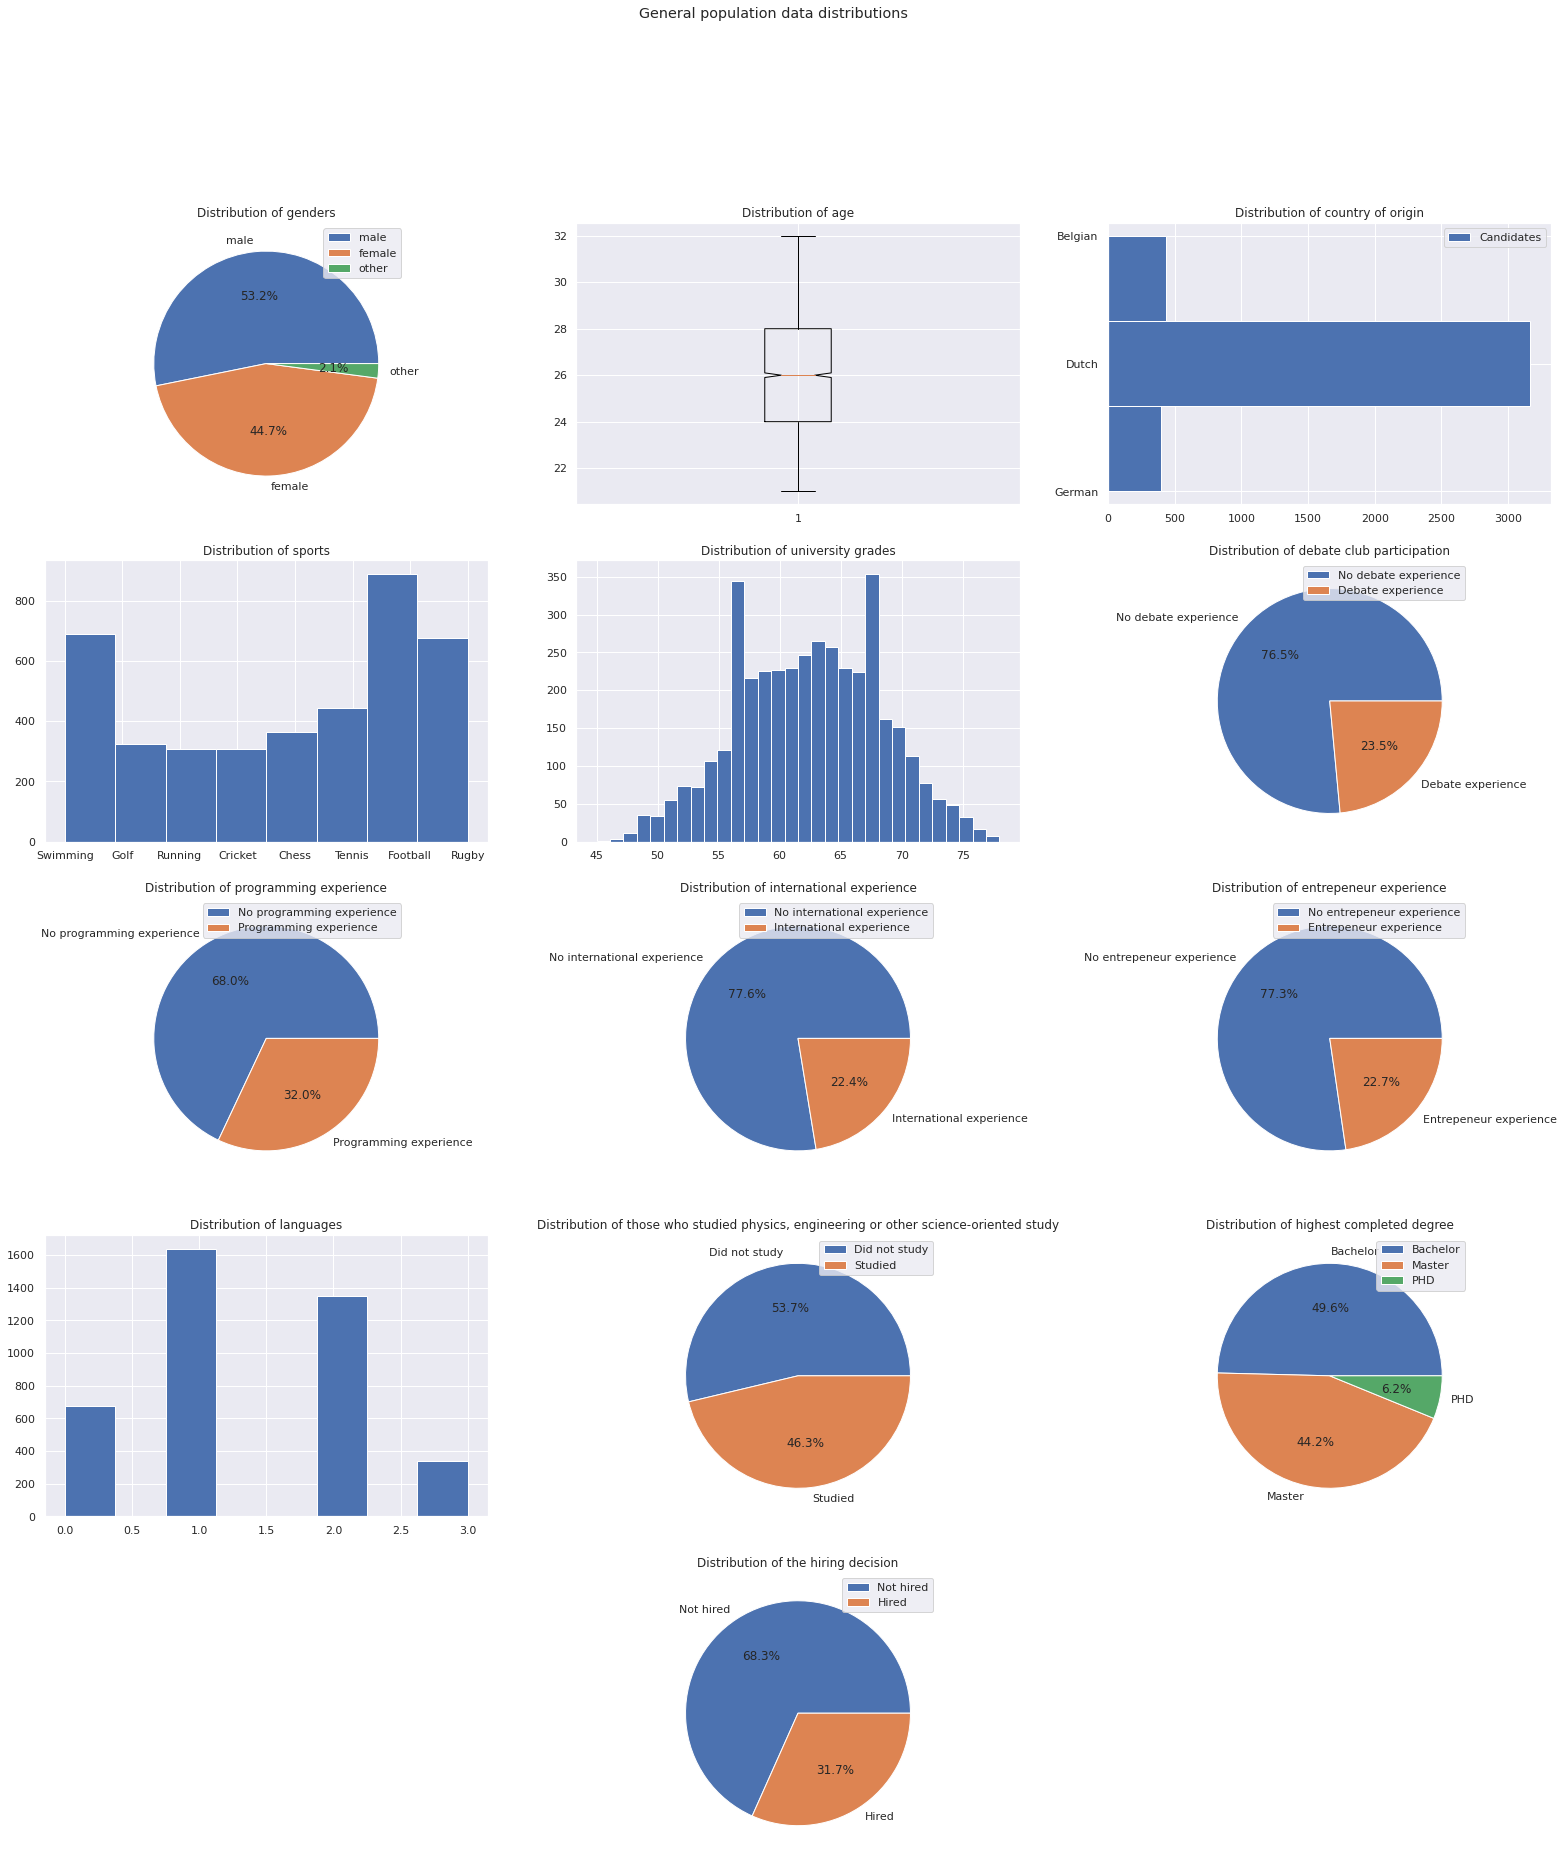

In [55]:
fig, axs = plt.subplots(5,3)
fig.suptitle('General population data distributions')
fig.set_figwidth(27)
fig.set_figheight(36)

axs[0, 0].set_title("Distribution of genders")
axs[0, 0].pie(recruitmentData['gender'].value_counts(), labels = ['male', 'female', 'other'], autopct='%1.1f%%')
axs[0, 0].legend()

axs[0, 1].set_title("Distribution of age")
axs[0, 1].boxplot(recruitmentData['age'], notch = True, showfliers = True)

axs[0, 2].set_title("Distribution of country of origin")
axs[0, 2].hist(recruitmentData['nationality'], label = 'Candidates', bins = 3, orientation='horizontal')
axs[0, 2].legend()

axs[1, 0].set_title("Distribution of sports")
axs[1, 0].hist(recruitmentData['sport'], orientation = 'vertical', bins = 8)

axs[1, 1].set_title("Distribution of university grades")
axs[1, 1].hist(recruitmentData['ind-university_grade'], bins = 30)

axs[1, 2].set_title("Distribution of debate club participation")
axs[1, 2].pie(recruitmentData['ind-debateclub'].value_counts(), labels = ['No debate experience', 'Debte experience'] , autopct='%1.1f%%')
axs[1, 2].legend()

axs[2, 0].set_title("Distribution of programming experience")
axs[2, 0].pie(recruitmentData['ind-programming_exp'].value_counts(), labels = ['No programming experience', 'Programming experience'] , autopct='%1.1f%%')
axs[2, 0].legend()

axs[2, 1].set_title("Distribution of international experience")
axs[2, 1].pie(recruitmentData['ind-international_exp'].value_counts(), labels = ['No international experience', 'International experience'] , autopct='%1.1f%%')
axs[2, 1].legend()

axs[2, 2].set_title("Distribution of entrepeneur experience")
axs[2, 2].pie(recruitmentData['ind-entrepeneur_exp'].value_counts(), labels = ['No entrepeneur experience', 'Entrepeneur experience'] , autopct='%1.1f%%')
axs[2, 2].legend()

axs[3, 0].set_title("Distribution of languages")
axs[3, 0].hist(recruitmentData['ind-languages'], bins = 8, align="mid")

axs[3, 1].set_title("Distribution of those who studied physics, engineering or other science-oriented study")
axs[3, 1].pie(recruitmentData['ind-exact_study'].value_counts(), labels = ['Did not study', 'Studied'] , autopct='%1.1f%%')
axs[3, 1].legend()

axs[3, 2].set_title("Distribution of highest completed degree")
axs[3, 2].pie(recruitmentData['ind-degree'].value_counts(), labels = ['Bachelor', 'Master', 'PHD'] , autopct='%1.1f%%')
axs[3, 2].legend()

axs[4, 0].set_visible(False)
axs[4, 2].set_visible(False)

axs[4, 1].set_title("Distribution of the hiring decision")
axs[4, 1].pie(recruitmentData['decision'].value_counts(), labels = ['Not hired', 'Hired'] , autopct='%1.1f%%')
axs[4, 1].legend()

### 1.2 Hiree descriptor data visualisation and analysis

We start of by visualising the distribution of the descriptors (gender, age, nationality and sport). Firstly, we will compare the distribution of descriptors for hirees of company C and the rest of the hiree population:


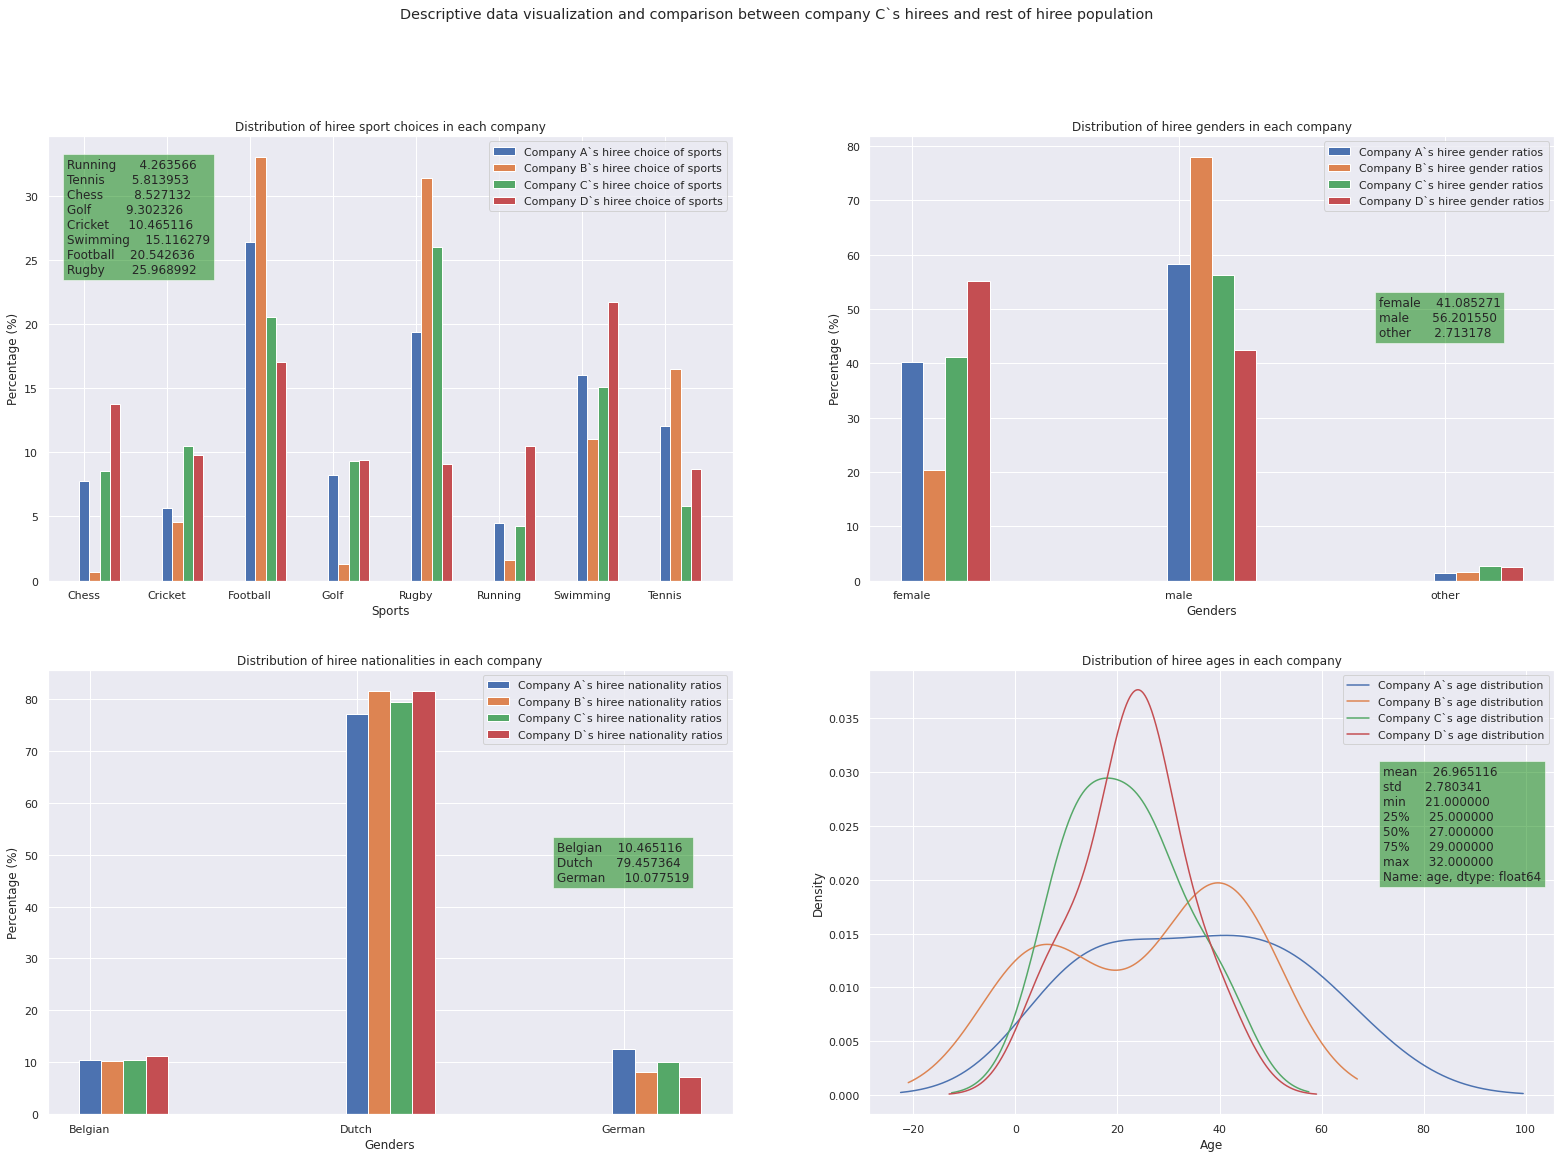

In [43]:
#Parameters used in plot creation
numberOfGenders = recruitmentData['gender'].unique().size
numberOfNationalities = recruitmentData['nationality'].unique().size
numberOfSports = recruitmentData['sport'].unique().size

fig, axs = plt.subplots(2,2)
fig.suptitle('Descriptive data visualization and comparison between company C`s hirees and rest of hiree population')
fig.set_figwidth(27)
fig.set_figheight(18)

#First Plot
XSportsAxis = np.arange(numberOfSports)

for idx, x in enumerate(recruitmentData['company'].unique()):
    sportFrame = recruitmentData.query("decision and company == '" + str(x) + "'")['sport']
    normalizedSportCounts = sportFrame.value_counts().sort_index().divide(sportFrame.count()).multiply(100)
    if (x == 'C'): axs[0, 0].text(-0.2, 24, normalizedSportCounts.sort_values().to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[0, 0].bar(XSportsAxis + idx/numberOfSports, normalizedSportCounts, width= 1/numberOfSports, label='Company ' + str(x) + '`s hiree choice of sports')

axs[0, 0].set_xticks(XSportsAxis)
axs[0, 0].set_xticklabels(recruitmentData['sport'].sort_values().unique().tolist())
axs[0, 0].set_xlabel('Sports')
axs[0, 0].set_ylabel('Percentage (%)')
axs[0, 0].set_title('Distribution of hiree sport choices in each company')
axs[0, 0].legend()

#Second Plot
XGendersAxis = np.arange(numberOfGenders)
for idx, x in enumerate(recruitmentData['company'].unique()):
    genderColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['gender']
    normalizedGenderCounts = genderColumn.value_counts().sort_index().divide(genderColumn.count()).multiply(100)
    if (x == 'C'): axs[0, 1].text(1.75, 45, normalizedGenderCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[0, 1].bar(XGendersAxis + idx/(numberOfGenders * 4), normalizedGenderCounts, width= 1/(numberOfGenders * 4), label='Company ' + str(x) + '`s hiree gender ratios')

axs[0, 1].set_xticks(XGendersAxis)
axs[0, 1].set_xticklabels(recruitmentData['gender'].sort_values().unique().tolist())
axs[0, 1].set_xlabel('Genders')
axs[0, 1].set_ylabel('Percentage (%)')
axs[0, 1].set_title('Distribution of hiree genders in each company')
axs[0, 1].legend()

#Third Plot
XNationalitiesAxis = np.arange(numberOfNationalities)
for idx, x in enumerate(recruitmentData['company'].unique()):
    nationalityColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['nationality']
    normalizedNationalityCounts = nationalityColumn.value_counts().sort_index().divide(nationalityColumn.count()).multiply(100)
    if (x == 'C'): axs[1, 0].text(1.75, 45, normalizedNationalityCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[1, 0].bar(XGendersAxis + idx/(numberOfNationalities * 4), normalizedNationalityCounts, width= 1/(numberOfNationalities * 4), label='Company ' + str(x) + '`s hiree nationality ratios')

axs[1, 0].set_xticks(XNationalitiesAxis)
axs[1, 0].set_xticklabels(recruitmentData['nationality'].sort_values().unique().tolist())
axs[1, 0].set_xlabel('Genders')
axs[1, 0].set_ylabel('Percentage (%)')
axs[1, 0].set_title('Distribution of hiree nationalities in each company')
axs[1, 0].legend()

#Fourth Plot
for idx, x in enumerate(recruitmentData['company'].unique()):
    ageColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['age']
    if (x == 'C'): axs[1, 1].text(72, 0.02, str(ageColumn.describe()[1:8]), bbox=dict(facecolor='green', alpha=0.5))
    axs[1, 1] = ageColumn.value_counts().plot(kind='density', label='Company ' + str(x) + '`s age distribution')
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Density')
axs[1, 1].set_title('Distribution of hiree ages in each company')
axs[1, 1].legend()


#### Descriptor analysis based on the plots above:

- In the first graph we can observe that for our company, the most practiced sport is Rugby (26% of the population) followed by Football (20.5% of the population) and then Swimming (15% of the population). Apart from these 3 sports, the other ones are significantly less practiced.

- In the second graph we can observe that the majority of the hirees for our company resembles the distribution of the other companies with male candidates representing the majority of hirees (56% of the candidates) but we can observe that, in comparison to company B's distribution, ours is way more evenly balanced.

- In the third graph we can observe that the distributions in terms of hiree nationalities is fairly the same for all companies which could signal that nationality as a feature could not be that impactful.

- Lastly, in the fourth graph we can observe that our company's hiree ages lean more towards an average age of 27 years old, the oldest hiree being 32 and the youngest being 21.

### 1.3 Hiree/Rejectee descriptor data visualisation and analysis

In the following section we will visualize the differences between all applicants for our company and the distributions of actual hirees.


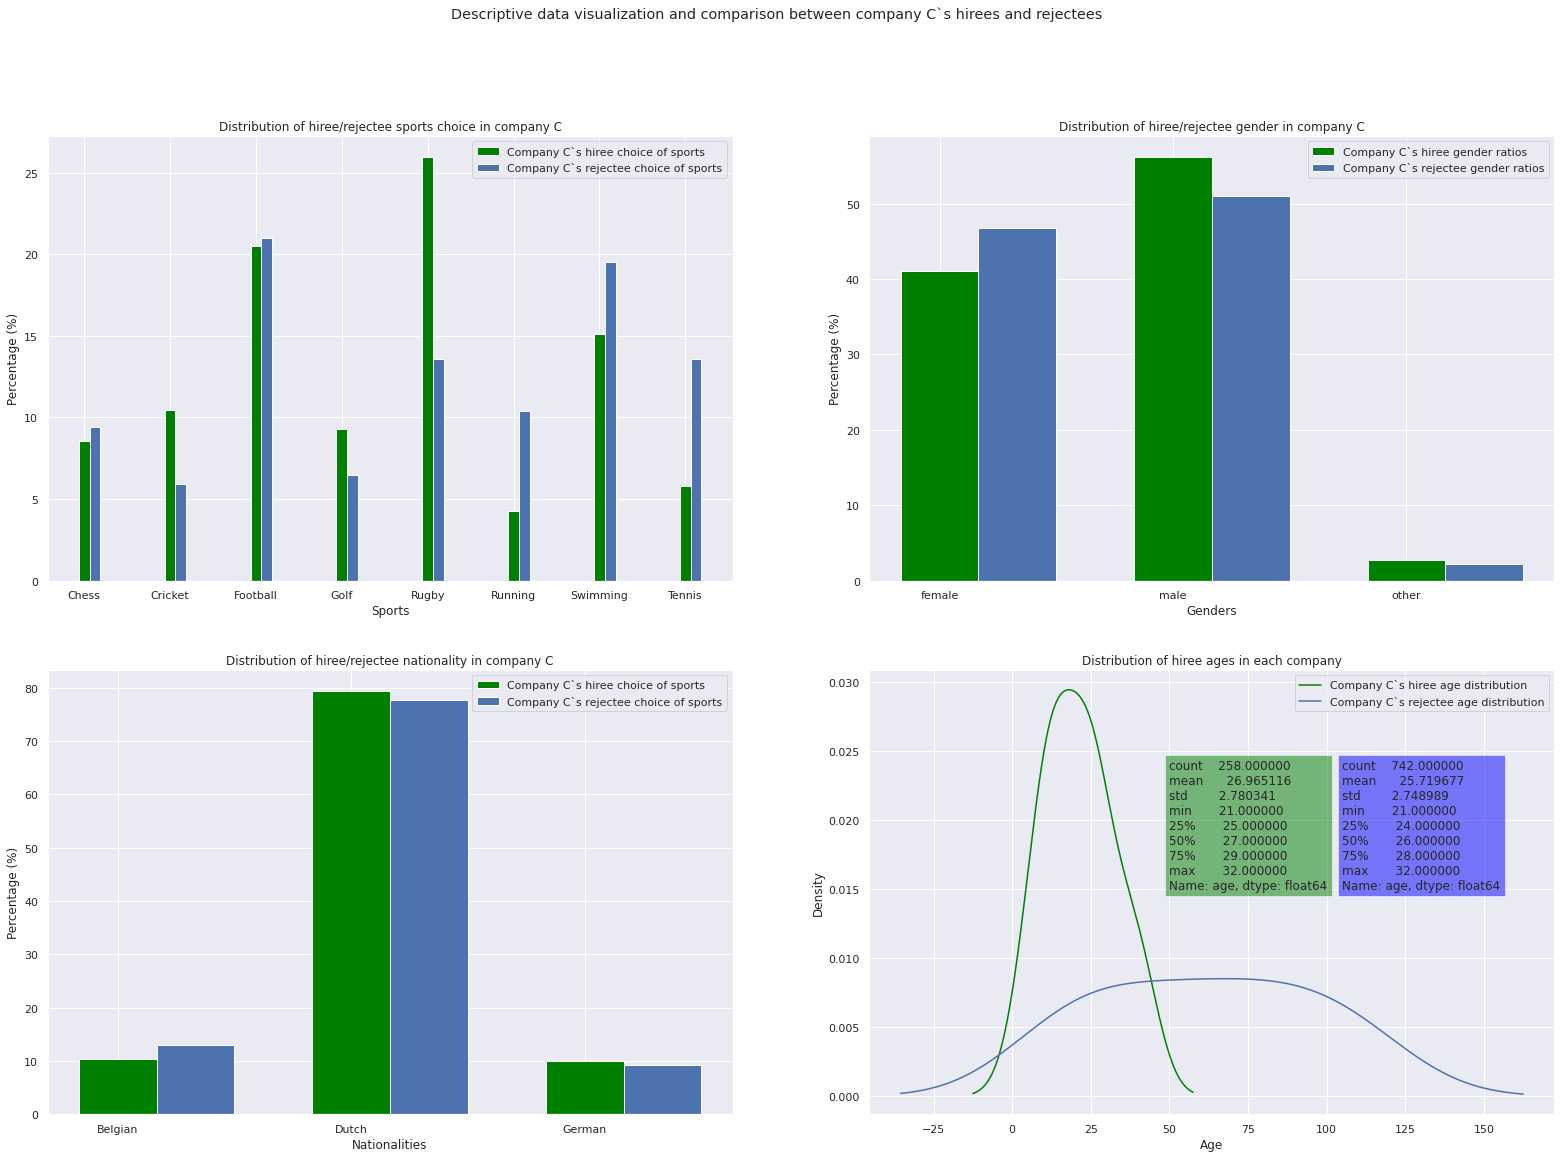

In [44]:
from turtle import color


fig, axs = plt.subplots(2,2)
fig.suptitle('Descriptive data visualization and comparison between company C`s hirees and rejectees')
fig.set_figwidth(27)
fig.set_figheight(18)

#Dataframe of interest
descriptorHireeDF = pd.DataFrame(recruitmentData.query("company == 'C' and decision"), columns=['age','gender','sport','nationality'])
descriptorRejecteeDF = pd.DataFrame(recruitmentData.query("company == 'C' and not decision"), columns=['age','gender','sport','nationality'])

#First plot
normalizedSportCountsHiree = descriptorHireeDF['sport'].value_counts().sort_index().divide(descriptorHireeDF['sport'].count()).multiply(100)
normalizedSportCountsRejectee = descriptorRejecteeDF['sport'].value_counts().sort_index().divide(descriptorRejecteeDF['sport'].count()).multiply(100)
axs[0, 0].bar(XSportsAxis, normalizedSportCountsHiree, width= 1/numberOfSports, label='Company C`s hiree choice of sports',color='green')
axs[0, 0].bar(XSportsAxis + 1/numberOfSports, normalizedSportCountsRejectee, width= 1/numberOfSports, label='Company C`s rejectee choice of sports')
axs[0, 0].set_xticks(XSportsAxis)
axs[0, 0].set_xticklabels(recruitmentData['sport'].sort_values().unique().tolist())
axs[0, 0].set_xlabel('Sports')
axs[0, 0].set_ylabel('Percentage (%)')
axs[0, 0].set_title('Distribution of hiree/rejectee sports choice in company C')
axs[0, 0].legend()

#Second plot
normalizedGenderCountsHiree = descriptorHireeDF['gender'].value_counts().sort_index().divide(descriptorHireeDF['gender'].count()).multiply(100)
normalizedGenderCountsRejectee = descriptorRejecteeDF['gender'].value_counts().sort_index().divide(descriptorRejecteeDF['gender'].count()).multiply(100)
axs[0, 1].bar(XGendersAxis, normalizedGenderCountsHiree, width= 1/numberOfGenders, label='Company C`s hiree gender ratios',color='green')
axs[0, 1].bar(XGendersAxis + 1/numberOfGenders, normalizedGenderCountsRejectee, width= 1/numberOfGenders, label='Company C`s rejectee gender ratios')
axs[0, 1].set_xticks(XGendersAxis)
axs[0, 1].set_xticklabels(recruitmentData['gender'].sort_values().unique().tolist())
axs[0, 1].set_xlabel('Genders')
axs[0, 1].set_ylabel('Percentage (%)')
axs[0, 1].set_title('Distribution of hiree/rejectee gender in company C')
axs[0, 1].legend()

#Third plot
normalizedNationalityCountsHiree = descriptorHireeDF['nationality'].value_counts().sort_index().divide(descriptorHireeDF['nationality'].count()).multiply(100)
normalizedNationalityCountsRejectee = descriptorRejecteeDF['nationality'].value_counts().sort_index().divide(descriptorRejecteeDF['nationality'].count()).multiply(100)
axs[1, 0].bar(XNationalitiesAxis, normalizedNationalityCountsHiree, width= 1/numberOfNationalities, label='Company C`s hiree choice of sports',color='green')
axs[1, 0].bar(XNationalitiesAxis + 1/numberOfNationalities, normalizedNationalityCountsRejectee, width= 1/numberOfNationalities, label='Company C`s rejectee choice of sports')
axs[1, 0].set_xticks(XNationalitiesAxis)
axs[1, 0].set_xticklabels(recruitmentData['nationality'].sort_values().unique().tolist())
axs[1, 0].set_xlabel('Nationalities')
axs[1, 0].set_ylabel('Percentage (%)')
axs[1, 0].set_title('Distribution of hiree/rejectee nationality in company C')
axs[1, 0].legend()

#Fourth plot
axs[1, 1] = descriptorHireeDF['age'].value_counts().plot(kind='density', label='Company C`s hiree age distribution',color='green')
axs[1, 1] = descriptorRejecteeDF['age'].value_counts().plot(kind='density', label='Company C`s rejectee age distribution')
axs[1, 1].text(50, 0.015, str(descriptorHireeDF['age'].describe()[0:8]), bbox=dict(facecolor='green', alpha=0.5))
axs[1, 1].text(105, 0.015, str(descriptorRejecteeDF['age'].describe()[0:8]), bbox=dict(facecolor='blue', alpha=0.5))
axs[1, 1].set_xlabel('Age')
axs[1, 1].set_ylabel('Density')
axs[1, 1].set_title('Distribution of hiree ages in each company')
axs[1, 1].legend()

### 1.4 Hiree indicator data visualisation and analysis

We start of by visualising the ratios of all indicator data. Firstly, we will compare the distribution of indicators for hirees of company C and the rest of the hiree population:

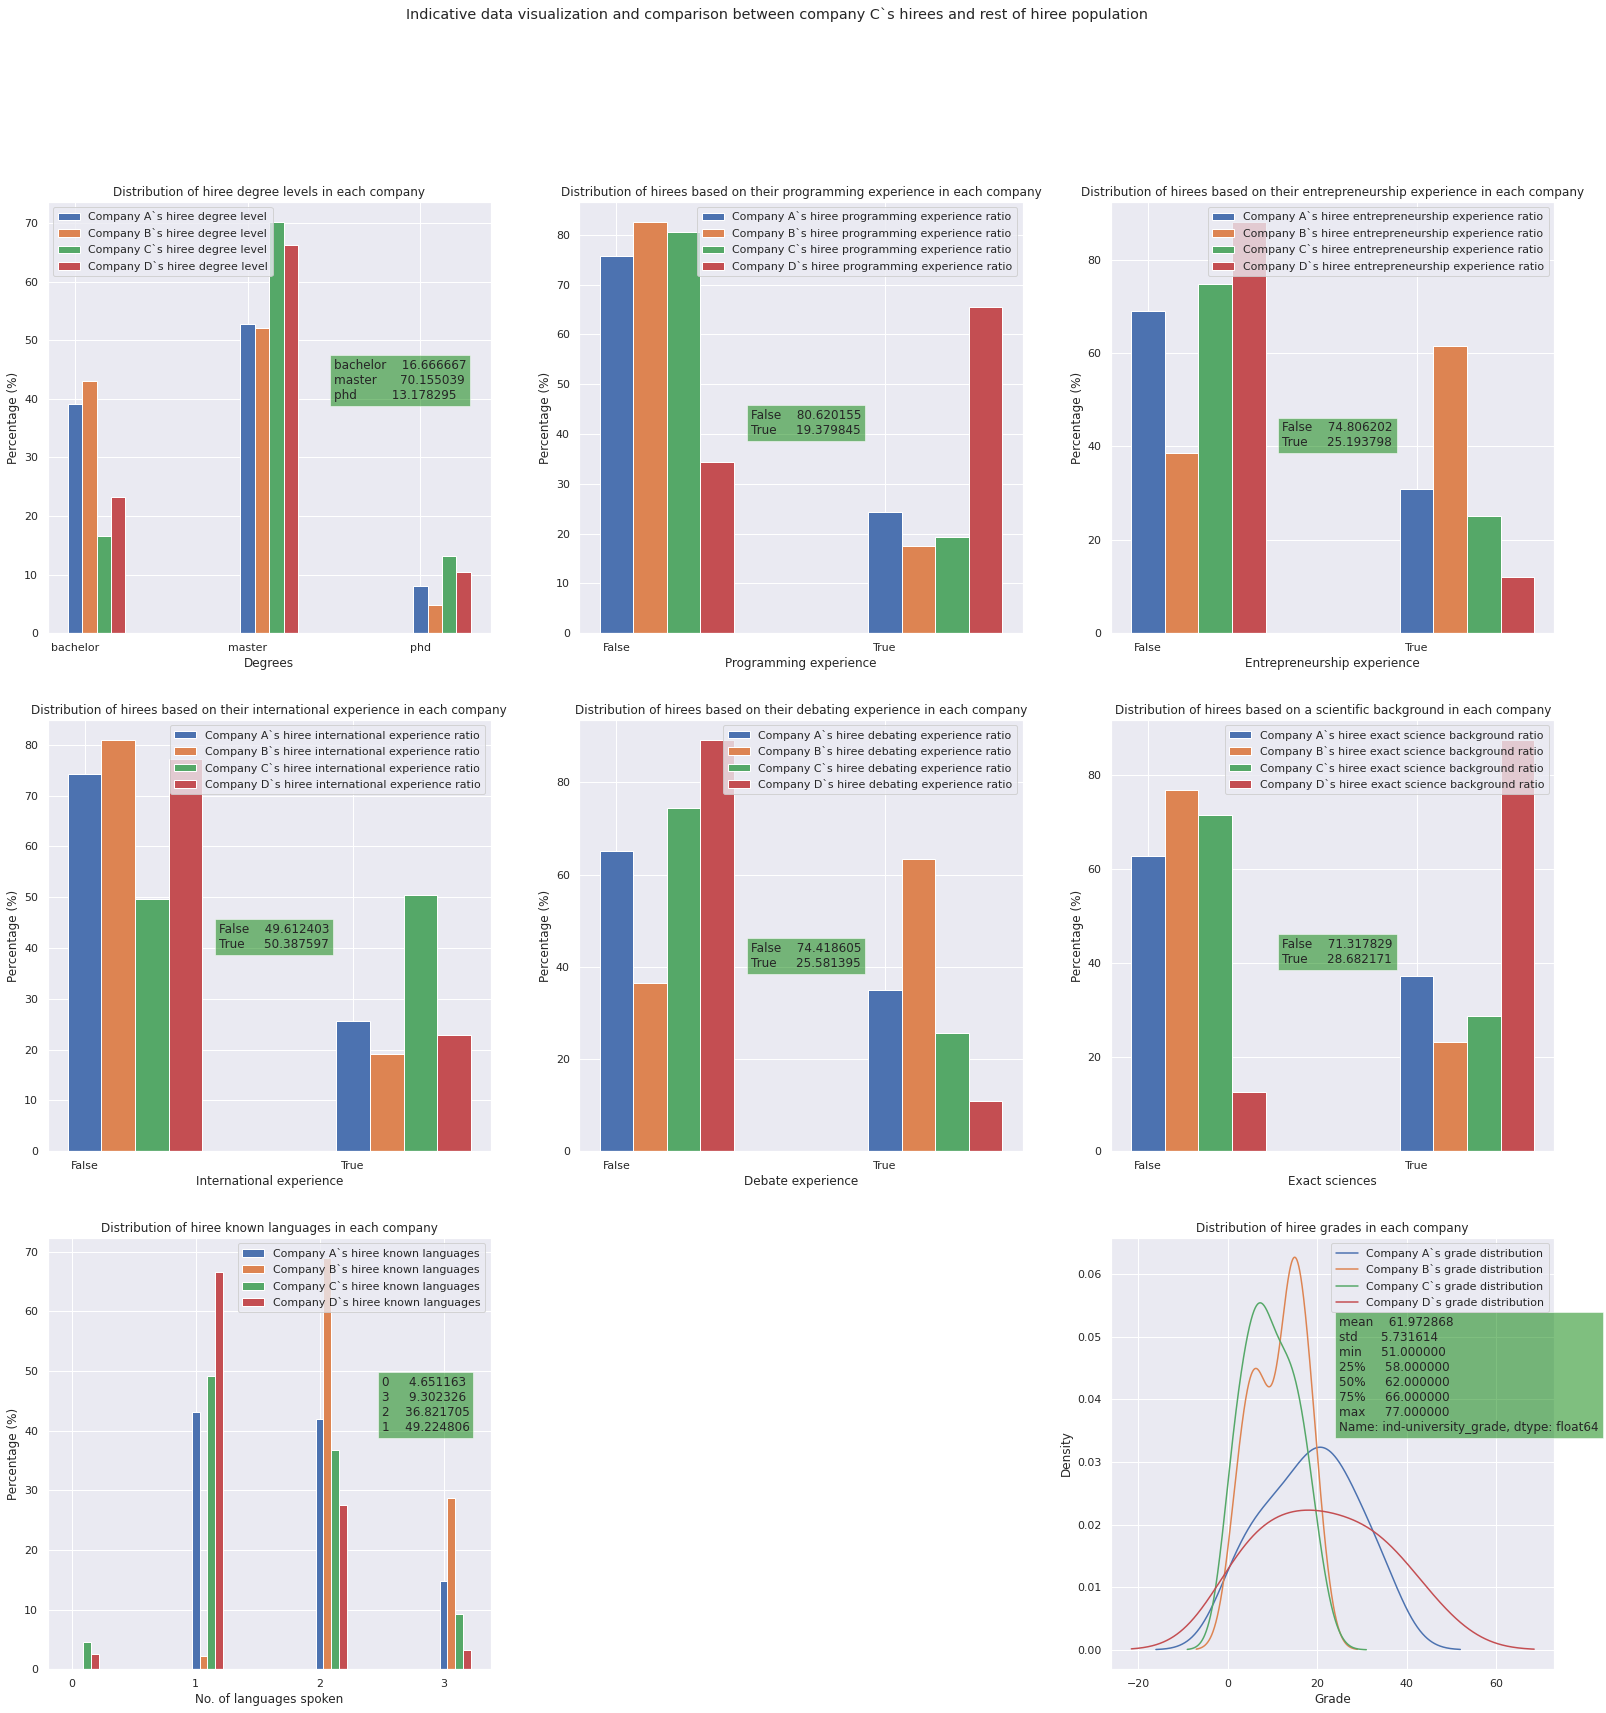

In [45]:
fig, axs = plt.subplots(3,3)
fig.suptitle('Indicative data visualization and comparison between company C`s hirees and rest of hiree population')
fig.set_figwidth(27)
fig.set_figheight(27)

#First plot
numberOfDegrees = recruitmentData['ind-degree'].unique().size
XDegreeAxis = np.arange(numberOfGenders)
for idx, x in enumerate(recruitmentData['company'].unique()):
    degreeColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['ind-degree']
    normalizedDegreeCounts = degreeColumn.value_counts().sort_index().divide(degreeColumn.count()).multiply(100)
    if (x == 'C'): axs[0, 0].text(1.5, 40, normalizedDegreeCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[0, 0].bar(XDegreeAxis + idx/(numberOfDegrees * 4), normalizedDegreeCounts, width= 1/(numberOfDegrees * 4), label='Company ' + str(x) + '`s hiree degree level')

axs[0, 0].set_xticks(XDegreeAxis)
axs[0, 0].set_xticklabels(recruitmentData['ind-degree'].sort_values().unique().tolist())
axs[0, 0].set_xlabel('Degrees')
axs[0, 0].set_ylabel('Percentage (%)')
axs[0, 0].set_title('Distribution of hiree degree levels in each company')
axs[0, 0].legend()

#Second plot
XBooleanAxis = np.arange(2)
for idx, x in enumerate(recruitmentData['company'].unique()):
    progColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['ind-programming_exp']
    normalizedProgCounts = progColumn.value_counts().sort_index().divide(progColumn.count()).multiply(100)
    if (x == 'C'): axs[0, 1].text(0.5, 40, normalizedProgCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[0, 1].bar(XBooleanAxis + idx/8, normalizedProgCounts, width= 1/8, label='Company ' + str(x) + '`s hiree programming experience ratio')

axs[0, 1].set_xticks(XBooleanAxis)
axs[0, 1].set_xticklabels(recruitmentData['ind-programming_exp'].sort_values().unique().tolist())
axs[0, 1].set_xlabel('Programming experience')
axs[0, 1].set_ylabel('Percentage (%)')
axs[0, 1].set_title('Distribution of hirees based on their programming experience in each company')
axs[0, 1].legend()

#Third plot
for idx, x in enumerate(recruitmentData['company'].unique()):
    entrepreneurColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['ind-entrepeneur_exp']
    normalizedEntrCounts = entrepreneurColumn.value_counts().sort_index().divide(entrepreneurColumn.count()).multiply(100)
    if (x == 'C'): axs[0, 2].text(0.5, 40, normalizedEntrCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[0, 2].bar(XBooleanAxis + idx/8, normalizedEntrCounts, width= 1/8, label='Company ' + str(x) + '`s hiree entrepreneurship experience ratio')

axs[0, 2].set_xticks(XBooleanAxis)
axs[0, 2].set_xticklabels(recruitmentData['ind-entrepeneur_exp'].sort_values().unique().tolist())
axs[0, 2].set_xlabel('Entrepreneurship experience')
axs[0, 2].set_ylabel('Percentage (%)')
axs[0, 2].set_title('Distribution of hirees based on their entrepreneurship experience in each company')
axs[0, 2].legend()

#Fourth plot
for idx, x in enumerate(recruitmentData['company'].unique()):
    internationalColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['ind-international_exp']
    normalizedInterCounts = internationalColumn.value_counts().sort_index().divide(internationalColumn.count()).multiply(100)
    if (x == 'C'): axs[1, 0].text(0.5, 40, normalizedInterCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[1, 0].bar(XBooleanAxis + idx/8, normalizedInterCounts, width= 1/8, label='Company ' + str(x) + '`s hiree international experience ratio')

axs[1, 0].set_xticks(XBooleanAxis)
axs[1, 0].set_xticklabels(recruitmentData['ind-international_exp'].sort_values().unique().tolist())
axs[1, 0].set_xlabel('International experience')
axs[1, 0].set_ylabel('Percentage (%)')
axs[1, 0].set_title('Distribution of hirees based on their international experience in each company')
axs[1, 0].legend()

#Fifth plot
for idx, x in enumerate(recruitmentData['company'].unique()):
    debateColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['ind-debateclub']
    normalizedDebateCounts = debateColumn.value_counts().sort_index().divide(debateColumn.count()).multiply(100)
    if (x == 'C'): axs[1, 1].text(0.5, 40, normalizedDebateCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[1, 1].bar(XBooleanAxis + idx/8, normalizedDebateCounts, width= 1/8, label='Company ' + str(x) + '`s hiree debating experience ratio')

axs[1, 1].set_xticks(XBooleanAxis)
axs[1, 1].set_xticklabels(recruitmentData['ind-debateclub'].sort_values().unique().tolist())
axs[1, 1].set_xlabel('Debate experience')
axs[1, 1].set_ylabel('Percentage (%)')
axs[1, 1].set_title('Distribution of hirees based on their debating experience in each company')
axs[1, 1].legend()

#Sixth plot
for idx, x in enumerate(recruitmentData['company'].unique()):
    debateColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['ind-exact_study']
    normalizedDebateCounts = debateColumn.value_counts().sort_index().divide(debateColumn.count()).multiply(100)
    if (x == 'C'): axs[1, 2].text(0.5, 40, normalizedDebateCounts.to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[1, 2].bar(XBooleanAxis + idx/8, normalizedDebateCounts, width= 1/8, label='Company ' + str(x) + '`s hiree exact science background ratio')

axs[1, 2].set_xticks(XBooleanAxis)
axs[1, 2].set_xticklabels(recruitmentData['ind-exact_study'].sort_values().unique().tolist())
axs[1, 2].set_xlabel('Exact sciences')
axs[1, 2].set_ylabel('Percentage (%)')
axs[1, 2].set_title('Distribution of hirees based on a scientific background in each company')
axs[1, 2].legend()

#Seventh plot
numberOfLanguages = recruitmentData['ind-languages'].unique().size
XLanguagesAxis = np.arange(0,numberOfLanguages)
for idx, x in enumerate(recruitmentData['company'].unique()):
    languageColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['ind-languages']
    normalizedLanguageCounts = languageColumn.value_counts().sort_index().divide(languageColumn.count()).multiply(100)
    if(normalizedLanguageCounts.index[0] != 0): normalizedLanguageCounts = pd.Series([0]).append(normalizedLanguageCounts)
    if (x == 'C'): axs[2, 0].text(2.5, 40, normalizedLanguageCounts.sort_values().to_string(), bbox=dict(facecolor='green', alpha=0.5))
    axs[2, 0].bar(XLanguagesAxis + idx/(numberOfLanguages*4), normalizedLanguageCounts, width= 1/(numberOfLanguages * 4), label='Company ' + str(x) + '`s hiree known languages')

axs[2, 0].set_xticks(XLanguagesAxis)
axs[2, 0].set_xticklabels(recruitmentData['ind-languages'].sort_values().unique().tolist())
axs[2, 0].set_xlabel('No. of languages spoken')
axs[2, 0].set_ylabel('Percentage (%)')
axs[2, 0].set_title('Distribution of hiree known languages in each company')
axs[2, 0].legend()

axs[2, 1].set_visible(False)

#Eigth plot
for idx, x in enumerate(recruitmentData['company'].unique()):
    gradeColumn = recruitmentData.query("decision and company == '" + str(x) + "'")['ind-university_grade']
    if (x == 'C'): axs[2, 2].text(25, 0.035, str(gradeColumn.describe()[1:8]), bbox=dict(facecolor='green', alpha=0.5))
    axs[2, 2] = gradeColumn.value_counts().plot(kind='density', label='Company ' + str(x) + '`s grade distribution')
axs[2, 2].set_xlabel('Grade')
axs[2, 2].set_ylabel('Density')
axs[2, 2].set_title('Distribution of hiree grades in each company')
axs[2, 2].legend()

#### Indicator analysis based on the plots above:

- In the first graph we can observe that for our company, the majority of the hirees have finished a masters degree (70% of the candidates) but this is the case for all the other companies as well.

- Based on the second, third, fifth and sixth graphs we can conclude that the majority of company C's hirees do not have any programming experience, any entrepreneurship experience, any debate experience and the majority also does not come from a scientific background.

- One thing to note (based on the fourth graph) is that the hirees of our company are evenly distributed between people that have had international experience and people that did not.

- Based on the eigth graph we can conclude that our company's hirees know around 2-3 other languages.

- Lastly, in terms of university grades, we can observe that the hirees of our company have an average of scores close to 62/100 with the maximum grade achieved being 77/100 and the lowest grade being 51/100.

### 1.5 Data cleaning and preparation

In this section we will evaluate the features that we have visualized in the plotting above, make some assumptions and test them in terms of data meaningfulness.
These assumption will be used when building a model in the hopes of achieving a fair discrete alternative to our categorical data.

In [46]:
#DataFrame
degreeFrame = pd.DataFrame(recruitmentData, columns=["age", "ind-university_grade", "ind-debateclub", "ind-programming_exp", "ind-international_exp", "ind-entrepeneur_exp", "ind-languages", "ind-exact_study", "ind-degree", "company", "decision"])

applicantDegreeColumn = degreeFrame['ind-degree']
hireeDegreeColumn = degreeFrame.query("decision")['ind-degree']

applicantDegreeColumnC = degreeFrame.query("company == 'C'")['ind-degree']
hireeDegreeColumnC = degreeFrame.query("company == 'C' and decision")['ind-degree']

print("Success rates of candidates in general")
for idx, x in enumerate(applicantDegreeColumn.sort_values().unique()):
    print("The success rate of hired people with a " + x + "'s degree is: " + str(100 * hireeDegreeColumn.value_counts()[x]/applicantDegreeColumn.value_counts()[x]) + "%")

print("Success rates of our company specifically")
for idx, x in enumerate(hireeDegreeColumnC.sort_values().unique()):
    print("The success rate of hired people with a " + x + "'s degree is: " + str(100 * hireeDegreeColumnC.value_counts()[x]/applicantDegreeColumnC.value_counts()[x]) + "%")

Success rates of candidates in general
The success rate of hired people with a bachelor's degree is: 20.463709677419356%
The success rate of hired people with a master's degree is: 42.34030525720746%
The success rate of hired people with a phd's degree is: 45.34412955465587%
Success rates of our company specifically
The success rate of hired people with a bachelor's degree is: 8.6%
The success rate of hired people with a master's degree is: 40.582959641255606%
The success rate of hired people with a phd's degree is: 62.96296296296296%


ind-languages_1         -0.405472
ind-languages_0         -0.262729
ind-exact_study         -0.236299
ind-programming_exp     -0.168813
ind-university_grade    -0.139012
ind-international_exp   -0.102010
ind-degree_phd          -0.078906
ind-degree_master       -0.002250
decision                 0.027853
age                      0.029100
ind-degree_bachelor      0.037905
ind-languages_2          0.349458
ind-languages_3          0.503924
ind-debateclub           0.522944
ind-entrepeneur_exp      1.000000
company_C                     NaN
Name: Ranking of the predictive power of indicators, dtype: float64


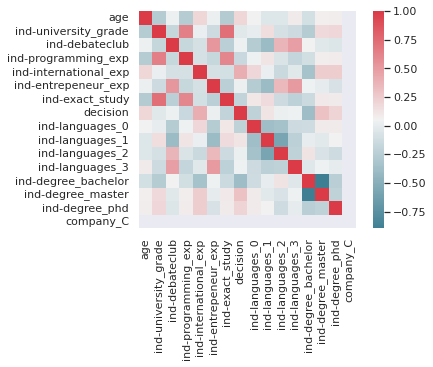

In [47]:
encoderOrd = preprocessing.OneHotEncoder()

degreeFrame = degreeFrame.query("company == 'C'")

degreeFrame['ind-languages'] = degreeFrame['ind-languages'].map(str)
x = pd.get_dummies(degreeFrame)
# print(x)
df = x
corr = df.corr()
seaborn.heatmap(corr, mask=np.zeros_like(corr), cmap=seaborn.diverging_palette(220, 10, as_cmap=True),
            square=True)
            
ranking = corr['decision']
ranking = ranking.sort_values()
ranking.name = "Ranking of the predictive power of indicators"
print(ranking)


In [48]:
#splitting dataset: independent var x, dependent var y
dataInScope = pd.DataFrame(df, columns=['ind-languages_1', 'ind-degree_master', 'ind-degree_phd', 'ind-international_exp', 'age'])
x = pd.DataFrame(dataInScope.values)
y = df['decision'].values

print(x)
#splitting dataset: training and test set, where 80% of the data is in the training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#feature scaling
vsc = StandardScaler()
x_train = vsc.fit_transform(x_train)

print(x_train)
x_test = vsc.transform(x_test)

#initializing ANN
classifier = Sequential()

#adding the input layer and hidden layer
#TODO : try diff activation
classifier.add(Dense(6, kernel_initializer='uniform', activation = 'relu', input_dim = 5))
#output layer
classifier.add(Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
classifier.fit(x_train, y_train, validation_split=0.33, epochs=150, batch_size=10)


score = classifier.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


     0  1  2      3   4
0    1  1  0   True  32
1    0  0  0  False  26
2    1  0  0  False  25
3    0  1  0  False  31
4    0  1  0  False  22
..  .. .. ..    ...  ..
995  1  0  1  False  22
996  0  0  1   True  26
997  0  0  0  False  25
998  1  0  0  False  23
999  0  0  0  False  28

[1000 rows x 5 columns]
[[ 1.25064086 -0.89091075 -0.24413654 -0.52915026 -0.72080142]
 [-0.79959006 -0.89091075 -0.24413654 -0.52915026 -1.7860252 ]
 [-0.79959006  1.12244688 -0.24413654  1.88982237  0.69949695]
 ...
 [ 1.25064086 -0.89091075 -0.24413654 -0.52915026  1.40964613]
 [ 1.25064086 -0.89091075 -0.24413654 -0.52915026  0.69949695]
 [ 1.25064086 -0.89091075 -0.24413654 -0.52915026  1.40964613]]
Epoch 1/150
54/54 [==============================] - 1s 4ms/step - loss: 0.6858 - accuracy: 0.7220 - val_loss: 0.6766 - val_accuracy: 0.7424
Epoch 2/150
54/54 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.7407 - val_loss: 0.6405 - val_accuracy: 0.7424
Epoch 3/150
54/54 [==

### 1.6 Correlations between descriptors and correlations between descriptors and indicators

Firstly we will evaluate correlation between combinations of descriptors and then we will follow with descriptor-indicator combinations and evaluate the correlation of those as well in order to pick the features of interest for our models.

From a business perspective, hiring based on features such as nationality, sports or gender is considered a bad practice because these features do not add any meaning to the interest of a recruitor in terms of hiree professional capabilities.

Because of this, we will compute correlations and build a model based on other meaningful data, discarding the columns of sports, nationality and gender.

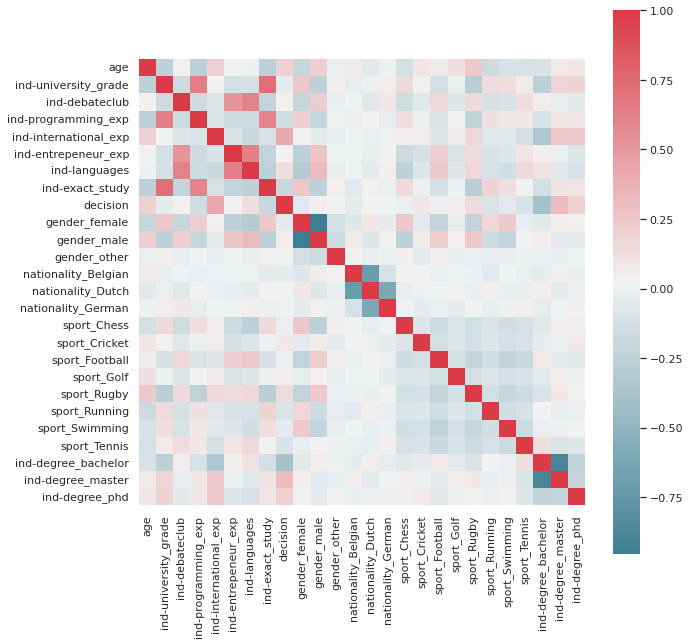

ind-degree_bachelor     -0.393112
ind-exact_study         -0.194558
ind-programming_exp     -0.159530
sport_Tennis            -0.106545
sport_Running           -0.094424
sport_Swimming          -0.049971
gender_female           -0.049927
ind-university_grade    -0.037285
nationality_Belgian     -0.032943
sport_Chess             -0.013728
sport_Football          -0.005183
nationality_German       0.011614
gender_other             0.016253
nationality_Dutch        0.017957
ind-entrepeneur_exp      0.027853
ind-debateclub           0.033267
gender_male              0.044885
sport_Golf               0.047959
sport_Cricket            0.077263
ind-languages            0.132866
sport_Rugby              0.144615
age                      0.194080
ind-degree_phd           0.202932
ind-degree_master        0.303153
ind-international_exp    0.406178
decision                 1.000000
Name: Ranking of the predictive power of indicators, dtype: float64


In [49]:
degreeFrame['ind-languages'] = degreeFrame['ind-languages'].map(str)

bins= [0,25,27,29,32,100]
labels = ['21-25','25-27','27-29','29-32','32+']
degreeFrame['ageGroup'] = pd.cut(degreeFrame['age'], bins=bins, labels=labels, right=False)

x = pd.get_dummies(degreeFrame)
# print(x)
df = x
corr = df.corr()
seaborn.heatmap(corr, mask=np.zeros_like(corr), cmap=seaborn.diverging_palette(220, 10, as_cmap=True),
            square=True)
            
ranking = corr['decision']
ranking = ranking.sort_values()
ranking.name = "Ranking of the predictive power of indicators"
print(ranking)


dataInScope = pd.DataFrame(df, columns=['ind-languages_2', 'ind-entrepeneur_exp', 'ind-debateclub', 'ageGroup_25-27'])
x = pd.DataFrame(dataInScope.values)
y = df['decision'].values

print(x)
#splitting dataset: training and test set, where 80% of the data is in the training set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

#feature scaling
vsc = StandardScaler()
x_train = vsc.fit_transform(x_train)

print(x_train)
x_test = vsc.transform(x_test)

#initializing ANN
classifier2 = Sequential()

#adding the input layer and hidden layer
#TODO : try diff activation
classifier2.add(Dense(6, kernel_initializer='uniform', activation = 'relu', input_dim = 4))
#output layer
classifier2.add(Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))

classifier2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
classifier2.fit(x_train, y_train, validation_split=0.33, epochs=150)


score = classifier2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
